In [1]:
import os
import yaml
import fnmatch
from conda_build.metadata import MetaData
from pprint import pprint
import binstar_client
import matplotlib.pyplot as plt
import copy
%matplotlib inline
import networkx as nx

In [36]:
token = open('/home/edill/dev/dotfiles/tokens/lightsource2-testing.token', 'r').read().strip()

In [47]:
cli = binstar_client.Binstar(domain="https://api.anaconda.org", token=token)

In [38]:
packages_on_conda_forge = set([f['full_name'].split('/')[1] for f in cli.show_channel('main', 'conda-forge')['files']])

In [49]:
ret = cli.show_channel('main', 'defaults')

In [51]:
cli.download??

In [46]:
binstar_client.Binstar?

In [42]:
packages_on_anaconda = set([f['full_name'].split('/')[1] for f in cli.show_channel('main', 'anaconda')['files']])

NotFound: ('Not Found: Nothing matches the given URI ([GET] http://api.anaconda.org/channels/anaconda/main -> 404)', 404)

In [3]:
def sanitize_names(list_of_names):
    list_of_names = [name.split(' ')[0] for name in list_of_names]
    list_of_names = [name for name in list_of_names]# if name not in packages_on_conda_forge]
    return list_of_names

In [4]:
# Get the list of folders to check
# get the tagged stack
path = os.path.join(os.path.expanduser("~"), 'dev', 'conda', 'auto-build-tagged-recipes')
folders = [os.path.join(path, 'recipes'), 
           os.path.join(os.path.expanduser('~'), 'dev', 'conda', 'skbeam-recipes', 'recipes')]

In [6]:
run = {}
build = {}
test = {}
for path_to_recipes in folders:
    for dirpath, dirnames, filenames in os.walk(path_to_recipes):
        if 'meta.yaml' not in filenames:
            continue
            # we are not in the right directory
        print("evaluating", dirpath)
        meta = MetaData(dirpath)
        name = meta.meta['package']['name']
        build[name] = sanitize_names(meta.meta.get('requirements', {}).get('build', []))
        run[name] = sanitize_names(meta.meta.get('requirements', {}).get('run', []))
        test[name] = sanitize_names(meta.meta.get('test', {}).get('requires', []))

evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/analysis
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/trackpy-0.3.0
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/tzlocal-1.1.2
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/datamuxer
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/chxtools
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/ixstools
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/pims-0.3.3
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/csxtools
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/ophyd
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/databroker
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/suitcase
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/h5py-2.6.0
evaluating /home/edill/dev/conda/auto-build-tagged-recipes/recipes/super_s

In [7]:
union = {k: set(test.get(k, []) + run.get(k, []) + build.get(k, []))
         for k in set(list(test.keys()) + list(build.keys()) + list(run.keys()))}


In [8]:
# drop all extra packages that I do not have conda recipes for
cleaned_union = {}
for name, items in union.items():
    cleaned_items = set()
    print("Checking", name)
    for item in items:
        if item not in union:
            print('\tdropping', item)
        else:
            cleaned_items.add(item)
    print('\n')
    cleaned_union[name] = cleaned_items

Checking pyepics
	dropping python
	dropping numpy
	dropping setuptools


Checking databroker
	dropping doct
	dropping setuptools
	dropping pandas
	dropping boltons
	dropping python
	dropping nslsii_dev_configuration
	dropping pytz
	dropping numpy
	dropping six
	dropping cytoolz
	dropping requests


Checking metadatastore
	dropping doct
	dropping boltons
	dropping python
	dropping nslsii_dev_configuration
	dropping pytz
	dropping numpy
	dropping six
	dropping pyyaml


Checking hdf5-lz4


Checking collection


Checking h5py
	dropping python
	dropping pkgconfig
	dropping numpy
	dropping six
	dropping cython


Checking xray-vision
	dropping pandas
	dropping python
	dropping pyqt
	dropping matplotlib
	dropping numpy
	dropping scipy
	dropping six


Checking pims
	dropping setuptools
	dropping libtiff
	dropping pillow
	dropping python
	dropping nose
	dropping jinja2
	dropping slicerator
	dropping six
	dropping numpy
	dropping scikit-image
	dropping tifffile


Checking trackpy
	dropping setupt

In [9]:
kw = dict(node_size=5, node_color='w', edge_color='b', alpha=0.25)

def make_network(packages_dict):
    G = nx.DiGraph()
    for package, deps in packages_dict.items():
#         print(package)
        for dep in deps:
#             print('\t{}'.format(dep))
            G.add_edge(package, dep)
    return G

In [10]:
run_G = make_network(run)
build_G = make_network(build)
all_G = make_network(union)

In [11]:
it = iter(all_G)

In [12]:
ret = next(it)

In [13]:
G = all_G.copy()
G.reverse()

In [14]:
G.edges()

[('pyepics', 'python'),
 ('pyepics', 'numpy'),
 ('pyepics', 'setuptools'),
 ('pyepics', 'epics-base'),
 ('metadatastore', 'doct'),
 ('metadatastore', 'pyyaml'),
 ('metadatastore', 'six'),
 ('metadatastore', 'numpy'),
 ('metadatastore', 'python'),
 ('metadatastore', 'nslsii_dev_configuration'),
 ('metadatastore', 'pytz'),
 ('metadatastore', 'boltons'),
 ('metadatastore', 'pymongo'),
 ('hdf5-lz4', 'hdf5'),
 ('collection', 'bluesky'),
 ('collection', 'pyolog'),
 ('collection', 'analysis'),
 ('collection', 'ophyd'),
 ('xray-vision', 'matplotlib'),
 ('xray-vision', 'scipy'),
 ('xray-vision', 'six'),
 ('xray-vision', 'numpy'),
 ('xray-vision', 'python'),
 ('xray-vision', 'pyqt'),
 ('xray-vision', 'pandas'),
 ('hkl', 'm4'),
 ('hkl', 'numpy'),
 ('hkl', 'gsl'),
 ('hkl', 'gobject-introspection'),
 ('hkl', 'pygobject3'),
 ('hkl', 'libtool'),
 ('hkl', 'python'),
 ('hkl', 'automake'),
 ('hkl', 'autoconf'),
 ('hkl', 'pkg-config'),
 ('exceptional', 'python'),
 ('exceptional', 'ipython'),
 ('exception

In [15]:
def print_and_trim(graph):
    nodes = [x for x in (G) if G.out_degree(x) == 0]
    for node in nodes:
        G.remove_node(node)
    for idx, node in enumerate(nodes):
        if node not in packages_on_conda_forge:
            nodes[idx] = node.upper()
    pprint(nodes)

print("Packges in all CAPS are packages that still need to be built")
count = 0
while G.nodes():
    print_and_trim(G)
    count += 1
    if count > 50:
        break

Packges in all CAPS are packages that still need to be built
['traitlets',
 'nose',
 'OPENPYXL',
 'slicerator',
 'numpy',
 'scipy',
 'NUMEXPR',
 'pillow',
 'ipython',
 'PYTEST',
 'tornado',
 'UJSON',
 'COVERAGE',
 'cython',
 'ipywidgets',
 'libtiff',
 'PKGCONFIG',
 'pytz',
 'six',
 'prettytable',
 'pixman',
 'freetype',
 'readline',
 'gsl',
 'ATOM',
 'ALBUM',
 'automake',
 'event-model',
 'cytoolz',
 'ENAML',
 'pandas',
 'NSLSII_DEV_CONFIGURATION',
 'matplotlib',
 'cycler',
 'historydict',
 'JUPYTER',
 'libtool',
 'scikit-image',
 'PYTABLES',
 'requests',
 'autoconf',
 'SETUPTOOLS',
 'python',
 'mongoquery',
 'doct',
 'cairo',
 'boltons',
 'xraylib',
 'keyring',
 'jsonschema',
 'NUMBA',
 'libffi',
 'pkg-config',
 'glib',
 'PYQT',
 'jinja2',
 'm4',
 'pyyaml',
 'zlib',
 'tifffile',
 'libpng',
 'LXML']
['XRAY-VISION',
 'EXCEPTIONAL',
 'SPHINX-BOOTSTRAP-THEME',
 'PIMS',
 'SUPER_STATE_MACHINE',
 'CAIRO-GOBJECT',
 'TZLOCAL',
 'EPICS-BASE',
 'lmfit',
 'hdf5',
 'PYMONGO',
 'PYOLOG']
['PYEPICS'

In [16]:
G.nodes()

[]

In [17]:
G.edges()

[]

In [18]:
rev = all_G.reverse()
[x for x in rev if rev.out_degree(x) == 0]

['collection',
 'hkl',
 'exceptional',
 'sphinx-bootstrap-theme',
 'csxtools',
 'pyxrf',
 'trackpy',
 'ixstools',
 'chxtools',
 'eiger-io']

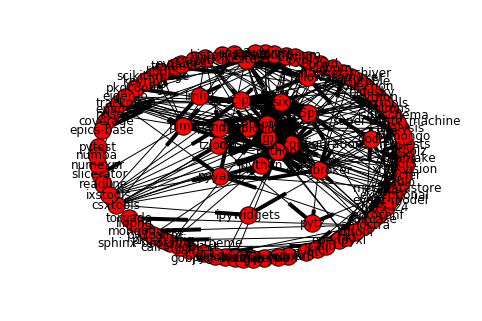

In [19]:
plt.figure()
pos = nx.spring_layout(all_G, k=.2, iterations=200)
nx.draw(all_G, pos, with_labels=True)

In [20]:
def trim_nodes(G, d):
    """Returns a copy of G without the nodes with a degree less than d.
    http://glowingpython.blogspot.com/2012/11/first-steps-with-networx.html
    """
    Gt = G.copy()
    dn = nx.degree(Gt)
    for n in Gt.nodes():
        if dn[n] <= d:
            Gt.remove_node(n)
    return Gt

def plot_deps(G, node, function):
    h = nx.from_dict_of_lists({node: getattr(G, function)(node)})
    nx.draw(h, with_labels=True, **kw)


In [21]:
list(nx.strongly_connected_components(all_G))

[{'python'},
 {'numpy'},
 {'setuptools'},
 {'readline'},
 {'epics-base'},
 {'pyepics'},
 {'traitlets'},
 {'doct'},
 {'pyyaml'},
 {'six'},
 {'boltons'},
 {'pymongo'},
 {'nslsii_dev_configuration'},
 {'pytz'},
 {'metadatastore'},
 {'zlib'},
 {'hdf5'},
 {'hdf5-lz4'},
 {'scipy'},
 {'matplotlib'},
 {'pyqt'},
 {'pandas'},
 {'xray-vision'},
 {'event-model'},
 {'cycler'},
 {'jinja2'},
 {'historydict'},
 {'tifffile'},
 {'libtiff'},
 {'pillow'},
 {'scikit-image'},
 {'nose'},
 {'slicerator'},
 {'pims'},
 {'tzlocal'},
 {'channelarchiver'},
 {'pkgconfig'},
 {'cython'},
 {'h5py'},
 {'jsonschema'},
 {'filestore'},
 {'cytoolz'},
 {'requests'},
 {'databroker'},
 {'super_state_machine'},
 {'bluesky'},
 {'ipython'},
 {'keyring'},
 {'pyolog'},
 {'mongoquery'},
 {'tornado'},
 {'ujson'},
 {'amostra'},
 {'ipywidgets'},
 {'lmfit'},
 {'datamuxer'},
 {'openpyxl'},
 {'jupyter'},
 {'suitcase'},
 {'coverage'},
 {'xraylib'},
 {'scikit-beam'},
 {'album'},
 {'analysis'},
 {'prettytable'},
 {'ophyd'},
 {'collection'},

In [22]:
packages_on_conda_forge

{'affine',
 'amqp',
 'antispoofing.utils',
 'antlr',
 'anyjson',
 'apache-libcloud',
 'appdirs',
 'apptools',
 'args',
 'arm_pyart',
 'arrow',
 'artview',
 'assetid',
 'auditwheel',
 'autoconf',
 'automake',
 'autopep8',
 'awesome-slugify',
 'azure',
 'azure-common',
 'azure-mgmt',
 'azure-mgmt-common',
 'azure-mgmt-compute',
 'azure-mgmt-network',
 'azure-mgmt-nspkg',
 'azure-mgmt-resource',
 'azure-mgmt-storage',
 'azure-nspkg',
 'azure-servicebus',
 'azure-servicemanagement-legacy',
 'azure-storage',
 'babel',
 'backports.functools_lru_cache',
 'backports.shutil_get_terminal_size',
 'basemap',
 'basemap-data-hires',
 'bdw-gc',
 'betamax',
 'betamax-matchers',
 'biggus',
 'billiard',
 'binaryornot',
 'binutils',
 'bison',
 'blas',
 'blinker',
 'bob',
 'bob.ap',
 'bob.bio.base',
 'bob.bio.gmm',
 'bob.bio.spear',
 'bob.blitz',
 'bob.core',
 'bob.db.arface',
 'bob.db.atnt',
 'bob.db.atvskeystroke',
 'bob.db.avspoof',
 'bob.db.banca',
 'bob.db.base',
 'bob.db.biosecure',
 'bob.db.biosecu

In [23]:
print("Build Order")
counter = 0
for item in reversed(nx.topological_sort(all_G)):
    if item not in packages_on_conda_forge:
        counter += 1
        print('{:>2}: {}'.format(counter, item))
    else:
        print('##: {}  # Package already on conda-forge'.format(item))

Build Order
##: readline  # Package already on conda-forge
 1: epics-base
 2: setuptools
##: numpy  # Package already on conda-forge
##: python  # Package already on conda-forge
 3: pyepics
##: traitlets  # Package already on conda-forge
##: pytz  # Package already on conda-forge
 4: nslsii_dev_configuration
 5: pymongo
##: boltons  # Package already on conda-forge
##: six  # Package already on conda-forge
##: pyyaml  # Package already on conda-forge
##: doct  # Package already on conda-forge
 6: metadatastore
##: zlib  # Package already on conda-forge
##: hdf5  # Package already on conda-forge
 7: hdf5-lz4
##: ipython  # Package already on conda-forge
##: tifffile  # Package already on conda-forge
##: jsonschema  # Package already on conda-forge
##: slicerator  # Package already on conda-forge
##: jinja2  # Package already on conda-forge
##: nose  # Package already on conda-forge
##: scikit-image  # Package already on conda-forge
##: pillow  # Package already on conda-forge
##: libtif

In [24]:
import graphviz as gv

def make_gv_network(packages_dict):
    graph = gv.Digraph(format='svg')
    for package, deps in packages_dict.items():
#         if package in packages_on_conda_forge: 
#             continue
        if deps == []:
            graph.node(package)
        for dep in deps:
#             if dep in packages_on_conda_forge:
#                 continue
            graph.edge(package, dep)
    return graph

gvG = make_gv_network(union)
gvG.render('all_dependencies')

'all_dependencies.svg'

In [25]:
graph = gv.Digraph(format='svg')

In [26]:
graph.node('foo', text='pink')

In [27]:
graph.edge('foo', 'bar')

In [28]:
graph.render('foo')

'foo.svg'

In [29]:
graph.edge??